# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_0 = The new email template does not result in a significant change in the sales of the company.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 = The new email template results in a significant increase in the sales of the company.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [8]:
# Calculate the required sample size
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

a = 0.05
std = 0.0475
d = 0.01
power = 0.8

cohen_d = d / std

# Z-scores for the given alpha and power
z_alpha = stats.norm.ppf(1 - a / 2)
z_beta = stats.norm.ppf(power)

# Calculate required sample size
n = ((z_alpha + z_beta) * std / d) ** 2

# Round up to the next whole number
n = int(n) + 1 if n % 1 != 0 else int(n)

print(f"The sample size per group is {n}")


The sample size per group is 178


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

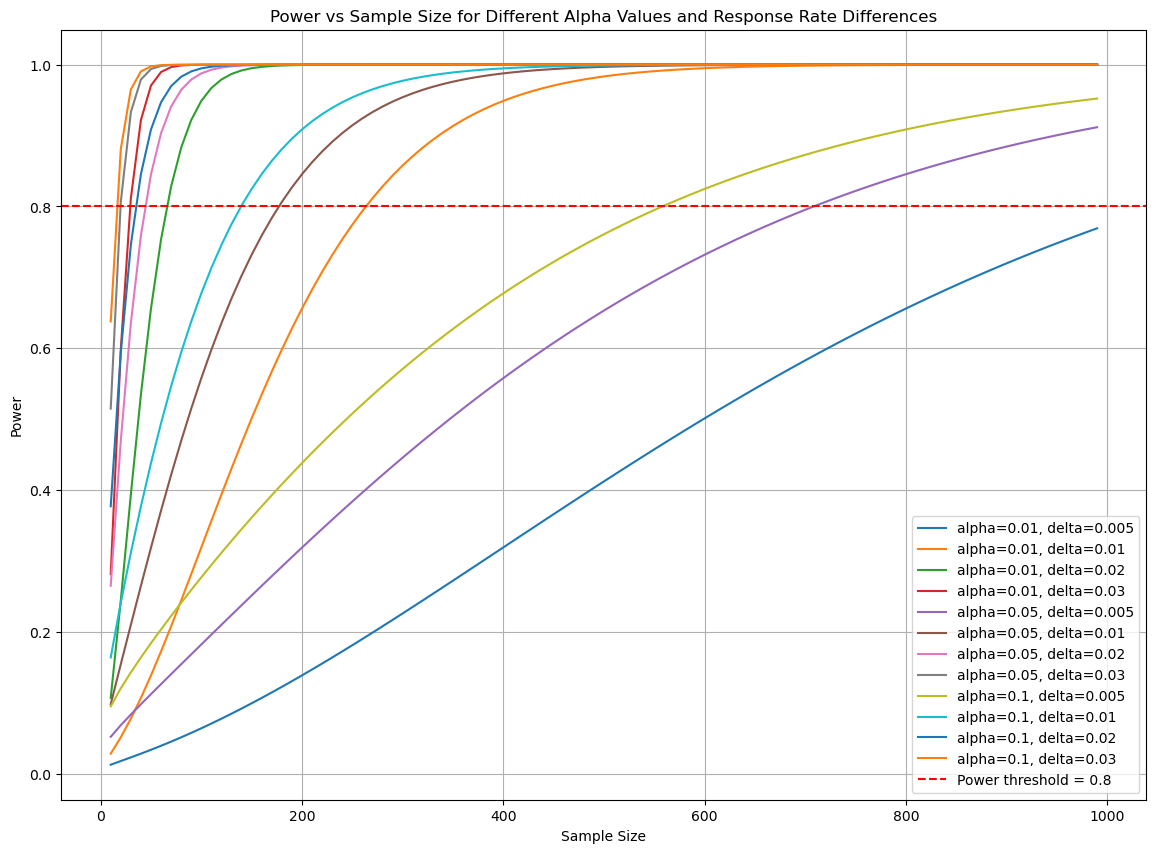

In [9]:

# Function to calculate required sample size
def calculate_sample_size(alpha, power, delta, std_dev):
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(power)
    n = ((z_alpha + z_beta) * std_dev / delta) ** 2
    return int(np.ceil(n))

# Parameters
alpha_values = [0.01, 0.05, 0.1]
delta_values = [0.005, 0.01, 0.02, 0.03]
std_dev = 0.0475
power = 0.8

# Generate data for the power vs sample size curves
sample_sizes = np.arange(10, 1000, 10)
power_curves = {alpha: {delta: [] for delta in delta_values} for alpha in alpha_values}

for alpha in alpha_values:
    for delta in delta_values:
        for n in sample_sizes:
            z_alpha = stats.norm.ppf(1 - alpha / 2)
            z_beta = (np.sqrt(n) * delta / std_dev) - z_alpha
            power_curve = stats.norm.cdf(z_beta)
            power_curves[alpha][delta].append(power_curve)

# Plot the curves
plt.figure(figsize=(14, 10))

for alpha in alpha_values:
    for delta in delta_values:
        plt.plot(sample_sizes, power_curves[alpha][delta], label=f'alpha={alpha}, delta={delta}')

plt.axhline(y=power, color='r', linestyle='--', label=f'Power threshold = {power}')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.title('Power vs Sample Size for Different Alpha Values and Response Rate Differences')
plt.legend()
plt.grid(True)
plt.show()



## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

Objective:
To determine the required sample size for a statistically significant difference in response rates between two groups, while maintaining a balance between statistical power, effect size, and type I error rate.
parameters
a = 0.05
std = 0.0475
d = 0.01
power = 0.8

advantages:
Balanced Type I and II Errors:
A standard alpha of 0.05 balances the risk of Type I error without being overly stringent.
A power of 0.8 ensures a good probability of detecting true effects.
Disadvantages:
Larger Sample Sizes for Stringent Criteria:
More stringent alpha values (e.g., 0.01) significantly increase the required sample size, which may be resource-intensive.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.